In [2]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [3]:
from word_level_da.preprocessing.load_data import Dataset

In [4]:
 %load_ext autoreload

In [5]:
 %autoreload 2

In [6]:
key="depresion19_local"

In [7]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

## Explore data

In [8]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

In [9]:
all_training= data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt",
                              partition="training")

In [10]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

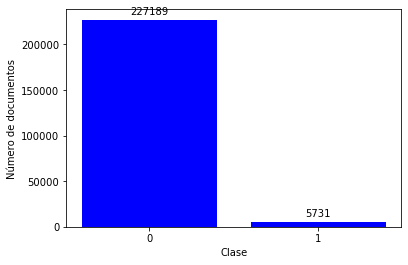

In [11]:
exp_cls.plot_class_distribution()

## Palabras dependientes de la clase incluyendo palabras de paro con p<0.001

In [12]:
ft=FeatureExtraction(all_training[0], w_range=(1,1), stop_wors=None, use_idf=True)

In [13]:
top_words_with_stop=ft.get_chi_2(all_training[1], k=1887, return_scores=True)

In [14]:
print("Numero de palabras")
len(top_words_with_stop)

Numero de palabras


1887

In [15]:
top_words_with_stop[0:100]

,score
therapist,3744.639292
therapy,2521.223169
playlist,1384.425536
kati,1355.273611
vids,1244.263424
...,...
kremlin,100.773707
psyd,98.624069
specializes,98.321380
betterhelp,96.753093


In [16]:
top_words_with_stop[-100:-1]

,score
bufoon,11.074488
lacier,11.071285
dysthymia,11.065371
differentiable,11.064092
biphasic,11.063443
...,...
tre,10.844983
jungkook,10.843518
baekhyun,10.843518
blackpink,10.843518


In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
#! pip install multidict

In [19]:
import multidict as multidict

In [20]:
def getFrequencyDictForText(table):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for index, row in table.iterrows():
        tmpDict[index] = int(row)
        
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [21]:
def generate_text(table):
    text=[]
    for index, row in table.iterrows():
        text.append((index+" ")*int(row))
    return " ".join(text)
    

In [22]:
gtext=generate_text(top_words_with_stop[0:50])

In [23]:
wc = WordCloud(background_color="white", max_words=50, mask=None, max_font_size=150, width=1200, height=720)

In [24]:
wc.generate_from_frequencies(getFrequencyDictForText(top_words_with_stop))

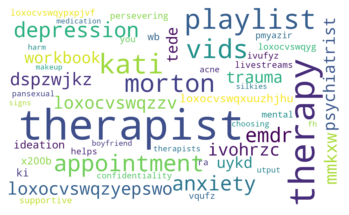

In [25]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
wc.to_file("D:/chi2_words_depresion.png")

## Clasificación con CHI2 considerando palabras de paro

In [27]:
from word_level_da.classifier.svm_text import Svm_Text

In [28]:
doc_test=\
data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt", partition="test")

In [29]:
len(doc_test[0])

23545

In [30]:
svm= Svm_Text(all_training[0], all_training[1], True)

In [31]:
svm.extract_features(doc_test[0], feature="word", method="tf-idf", nrange1=(1,1) , nrange2=None, 
     k=len(top_words_with_stop), stop_words=None, norm="l2", idf=True, feature_selection=True, reduce_method="Xi")


# Features:  (232920, 1887)
Training:  (232920, 1887)
Testing:  (23545, 1887)


In [32]:
len(doc_test[3])

2

In [33]:
score= svm.train_and_test(doc_test[1], doc_test[3])

In [34]:
score

[1887,
 0.4714285714285714,
 0.9259259259259259,
 0.4166666666666667,
 0.5747126436781609]

scoreDistribución en la clase positiva

In [35]:
positive_docs=[]
positive_labels=[]

In [36]:
for doc, label  in zip(all_training[0],all_training[1]):
    if label==1:
        positive_docs.append(doc)
        positive_labels.append(label)
        

In [37]:
len(positive_docs)

5731

In [38]:
exp_cls_p=explore_data(positive_docs, positive_labels, "D:/", plot_format="png")

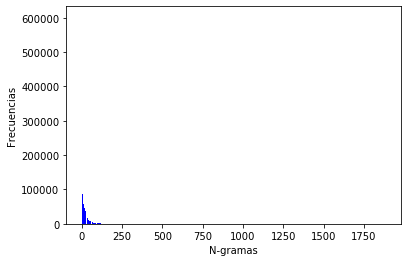

In [39]:
exp_cls.plot_frequency_distribution_of_word_list(
    ngram_range=(1,1), show_labels=False,
    by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia clase positiva

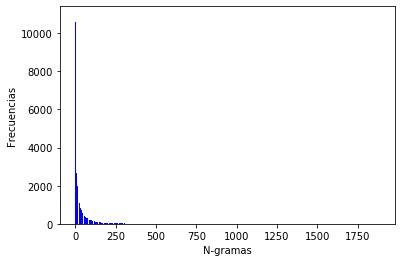

In [40]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia por documentos

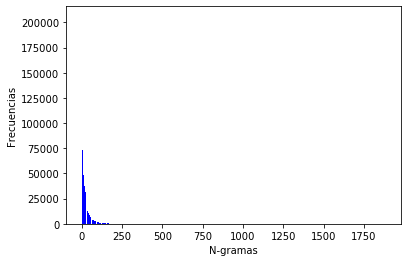

In [41]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

### Clase positiva

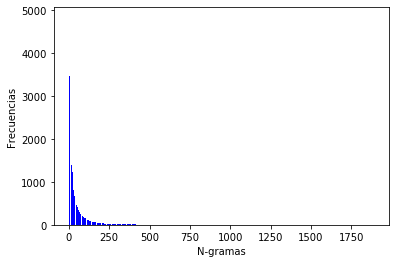

In [42]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

In [43]:
negative_docs=[]
negative_labels=[]

In [44]:
for doc, label in zip(all_training[0], all_training[1]):
    if label==0:
        negative_docs.append(doc)
        negative_labels.append(label)
        

In [45]:
len(negative_docs)

227189

In [46]:
exp_cls_n=explore_data(negative_docs, negative_labels, "D:/", plot_format="png")

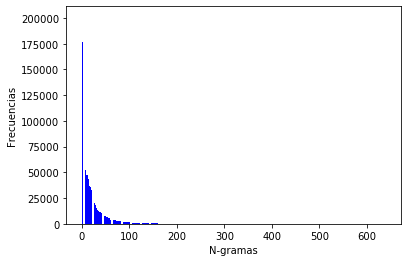

In [47]:
exp_cls_n.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)